In [ ]:
#Route Efficiency & Cluster Analysis – Zepto


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load cleaned data
df = pd.read_csv('zepto_logistics_cleaned.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                3732 non-null   object 
 1   name                    3732 non-null   object 
 2   mrp                     3732 non-null   int64  
 3   discountPercent         3732 non-null   int64  
 4   availableQuantity       3732 non-null   int64  
 5   discountedSellingPrice  3732 non-null   int64  
 6   weightInGms             3732 non-null   int64  
 7   outOfStock              3732 non-null   bool   
 8   quantity                3732 non-null   int64  
 9   Delivery_Zone           3732 non-null   object 
 10  Distance_km             3732 non-null   float64
 11  Partner_Type            3732 non-null   object 
 12  Fuel_Cost               3732 non-null   float64
 13  Partner_Payout          3732 non-null   float64
 14  Delivery_Time_min       3732 non-null   

In [5]:
#Prepare Clustering Data


features = ['Distance_km', 'Delivery_Time_min', 'Partner_Payout']
clustering_df = df[features].replace(0, pd.NA).dropna()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clustering_df)


In [7]:
#Run KMeans Clustering

# Fit KMeans 
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_df['Cluster'] = kmeans.fit_predict(X_scaled)


df = df.loc[clustering_df.index]
df['Route_Cluster'] = clustering_df['Cluster']


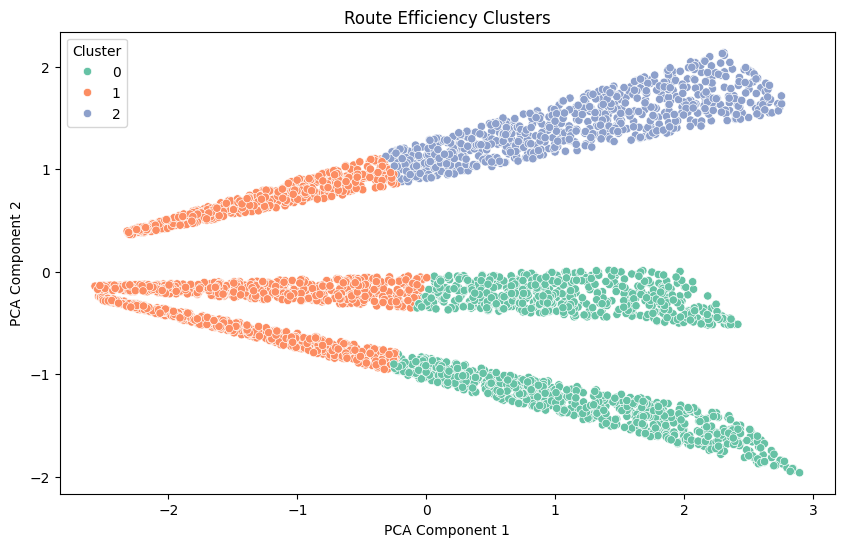

In [8]:
#Visualize Clusters using PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=clustering_df['Cluster'], palette='Set2')
plt.title('Route Efficiency Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [9]:
# Describe each cluster
summary = df.groupby('Route_Cluster')[['Distance_km', 'Delivery_Time_min', 'Partner_Payout']].mean()
summary['Count'] = df['Route_Cluster'].value_counts()
print(summary)


               Distance_km  Delivery_Time_min  Partner_Payout  Count
Route_Cluster                                                       
0                 5.293407          40.680632       17.987099   1265
1                 1.997625          12.393148       13.285046   1722
2                 5.055302          20.260000       35.276510    745


In [14]:

df[[ 'Delivery_Zone', 'Distance_km', 'Delivery_Time_min', 'Route_Cluster']].to_csv('route_cluster_labels.csv', index=False)
print("Route cluster labels saved as 'route_cluster_labels.csv'")

Route cluster labels saved as 'route_cluster_labels.csv'


In [ ]:
# Route Efficiency & Cluster Analysis
In this notebook, we analyze delivery routes using unsupervised learning to cluster similar delivery patterns based on time, distance, and cost.

## Key Learnings:
- Identified efficient and inefficient delivery clusters
- Routes grouped into 3 segments: quick, costly, and delayed
- Useful for assigning partners or optimizing delivery routing
